In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/Faculdade/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/Faculdade/test.csv')

In [ ]:
df = pd.concat([df_test, df_train])

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
for column in df_train.columns:
  print(f'{column}: {df_train[column].isnull().sum()}')

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 0
Embarked: 2


In [ ]:
df_train['Cabin'] = df_train['Cabin'].fillna('')

<Axes: >

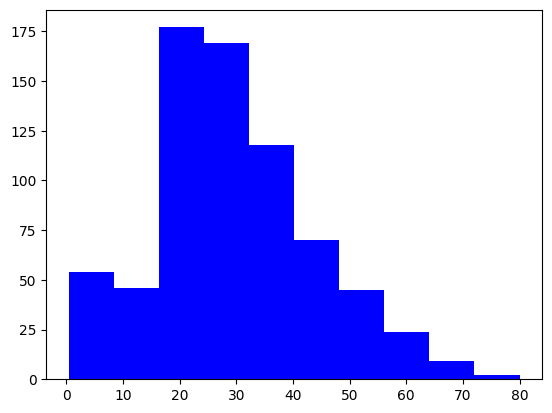

In [ ]:
df_train['Age'].hist(color='blue', grid=False)

In [ ]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [ ]:
df_train['Embarked'] = df_train['Embarked'].fillna(method='bfill')

<ipython-input-54-0a1ebf522f88>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['Embarked'] = df_train['Embarked'].fillna(method='bfill')


In [ ]:
df_train['Fare'] = df_train['Fare'].fillna(df['Fare'].median())

In [ ]:
df_train_variables = df_train[['Pclass', 'Sex', 'Age','Fare', 'Survived', 'Embarked']]

In [ ]:
df_train_variables = pd.get_dummies(df_train_variables, drop_first=True)

In [ ]:
df_train_variables.head()

,Pclass,Age,Fare,Survived,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,True,False,False,True
1,1,38.0,71.2833,1,False,True,False,False
2,3,26.0,7.9250,1,False,False,False,True
3,1,35.0,53.1000,1,False,False,False,True
4,3,35.0,8.0500,0,True,False,False,True


In [ ]:
from re import X
X = df_train_variables.drop('Survived', axis=1)
y = df_train_variables['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.68


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[134  23]
 [ 62  49]]
